In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import numpy.random as rng
from sklearn import datasets, neighbors
import seaborn as sns
import pandas as pd
np.set_printoptions(precision=3) # limit precision when printing arrays

In [5]:
# Sample Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# To suppress boring warnings...
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [7]:
### This is the code block to load the csv files for training/testing.

datasets  = {}

df = pd.read_csv(r'C:\Users\adwan\Documents\!AIML231\data/ionosphere_new.csv')
X, y = df.drop('class', axis=1),  df['class']
datasets["ionosphere"] = (X,y)

df = pd.read_csv(r'C:\Users\adwan\Documents\!AIML231\data/steelplates_new.csv')
X, y = df.drop('Class', axis=1),  df['Class']
datasets["steelplates"] = (X,y)

df = pd.read_csv(r'C:\Users\adwan\Documents\!AIML231\data/banknotes_new.csv')
X, y = df.drop('Class', axis=1),  df['Class']
datasets["banknotes"] = (X,y)

# TODO: set the number of trials required to evaluate the performance of a classifier.
nTrials = 50

In [11]:
import numpy as np
import random

@ignore_warnings(category=ConvergenceWarning)
def test(dataname, classifier, controlName, controlOptions, noXtics=False):
    random.seed(100)  # Python's built-in random module
    np.random.seed(100)
    
    X,y = datasets[dataname]

    # TODO: Use function StandardScaler().fit_transform() to standardize the value range of each feature in the dataset.
    X =StandardScaler().fit_transform(X)
    
    org_ctl_options = controlOptions

    scores = np.zeros(shape=(nTrials, len(controlOptions)))
    for t in range(nTrials):
        # TODO: perform train test split with the 50:50 ratio.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
        
        for i,option in enumerate(controlOptions):
            model = classifier(**{controlName: option})
            # TODO: perform model training.
            model.fit(X_train, y_train)
            
            scores[t,i] += model.score(X_test, y_test)

    # Draw the box plots to visually display the model performance.
    if controlName in ['alpha']: controlOptions = np.log10(controlOptions) # for semilogx
    elif controlName in ['kernel']: controlOptions = [1, 2, 3, 4]
    a = plt.boxplot(scores, positions=controlOptions, showfliers=False, showmeans=True)
    if noXtics:
        plt.xticks([])
    else:
        if controlName in ['kernel']:
            plt.xticks(controlOptions, org_ctl_options)
        plt.xlabel(controlName)
    plt.title(dataname + " " + type(model).__name__[:12])
    print("{0:.2f} was the best {1} on {2}".format(np.max(scores.mean(axis=0)),type(model).__name__[:12],dataname))
    return(plt)

In [12]:
def testSeveralDatas(classifier, controlName, options):
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    test("banknotes", classifier, controlName, options)
    plt.subplot(132)
    test("steelplates", classifier, controlName, options)
    plt.subplot(133)
    test("ionosphere", classifier, controlName, options)
    plt.savefig(type(classifier()).__name__ + ".png")

1.00 was the best KNeighborsCl on banknotes
0.98 was the best KNeighborsCl on steelplates
0.85 was the best KNeighborsCl on ionosphere


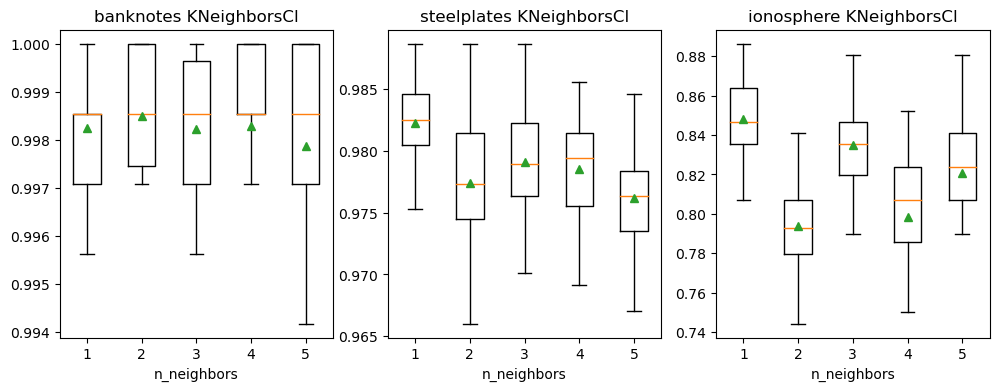

In [13]:
testSeveralDatas(KNeighborsClassifier,"n_neighbors", range(1,6,1))

0.99 was the best LogisticRegr on banknotes
1.00 was the best LogisticRegr on steelplates
0.87 was the best LogisticRegr on ionosphere


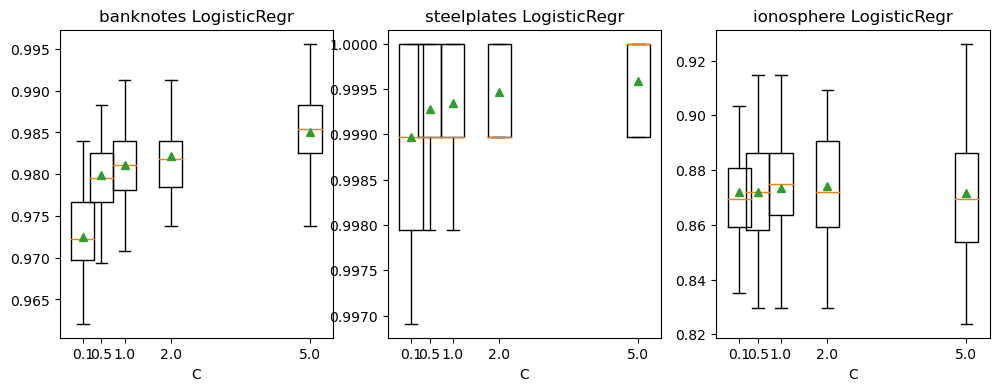

In [8]:
testSeveralDatas(LogisticRegression,"C", [.1,.5,1.0,2.0, 5.0])

0.98 was the best DecisionTree on banknotes
1.00 was the best DecisionTree on steelplates
0.88 was the best DecisionTree on ionosphere


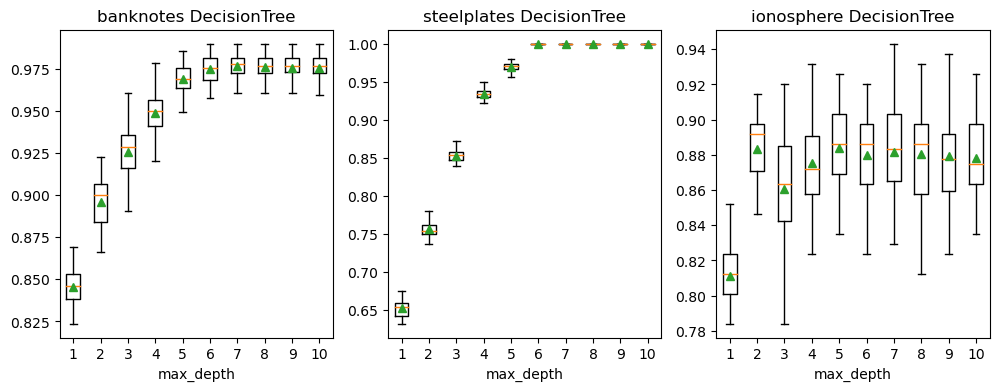

In [9]:
testSeveralDatas(DecisionTreeClassifier,"max_depth", range(1,11,1))

0.99 was the best RandomForest on banknotes
0.99 was the best RandomForest on steelplates
0.93 was the best RandomForest on ionosphere


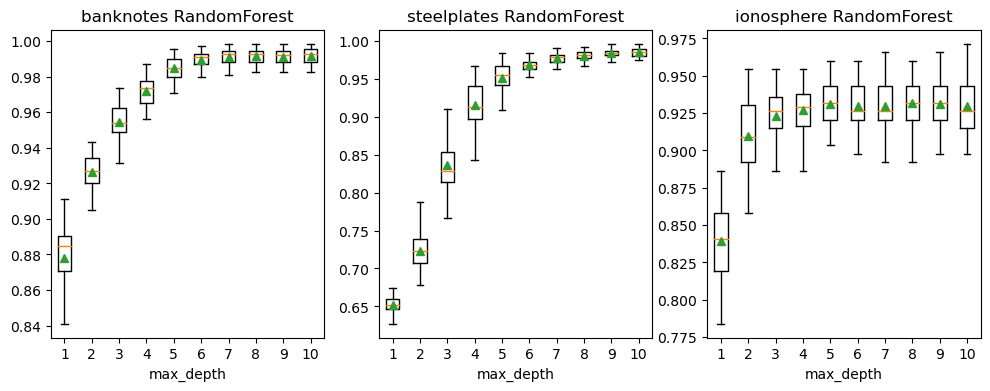

In [10]:
testSeveralDatas(RandomForestClassifier, "max_depth", range(1,11,1))

1.00 was the best MLPClassifie on banknotes
1.00 was the best MLPClassifie on steelplates
0.90 was the best MLPClassifie on ionosphere


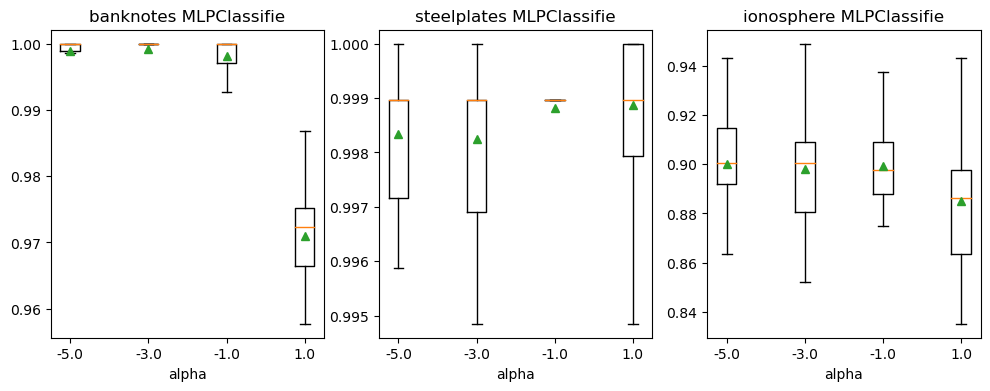

In [11]:
testSeveralDatas(MLPClassifier,"alpha",[1e-5, 1e-3,0.1,10.0]) 

1.00 was the best SVC on banknotes
1.00 was the best SVC on steelplates
0.93 was the best SVC on ionosphere


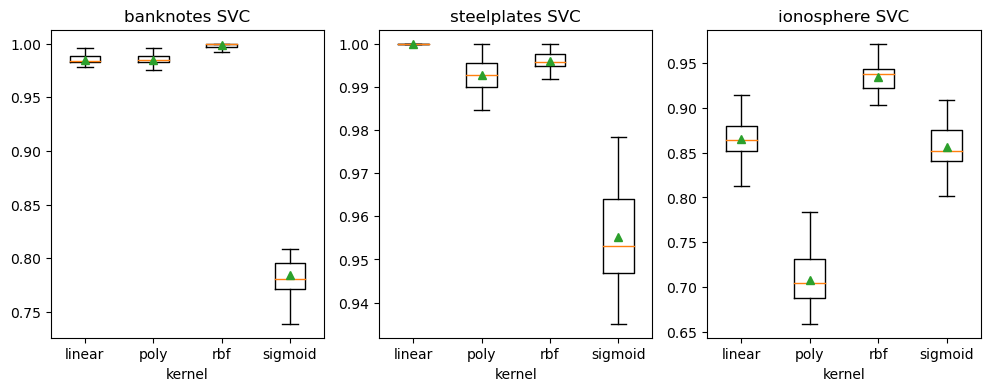

In [12]:
testSeveralDatas(SVC, "kernel" , ['linear','poly', 'rbf', 'sigmoid'])

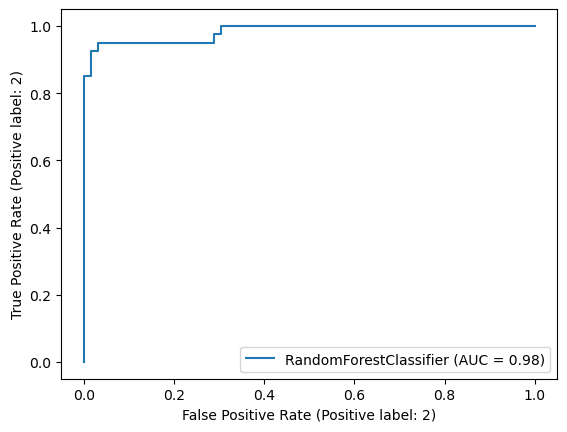

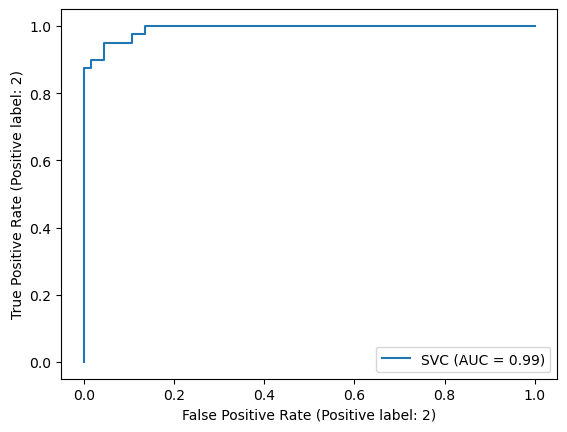

In [10]:
### This code block can be used to generate the ROC curves of the random forest classifier on one dataset. We set the maximum depth to 5.

from sklearn.metrics import RocCurveDisplay
import numpy as np
import random

random.seed(100)
np.random.seed(100)

X, y = datasets["ionosphere"]


# TODO: Use function StandardScaler().fit_transform() to standardize the value range of each feature in the dataset.
X = StandardScaler().fit_transform(X)


# TODO: perform train test split with the 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)




# Initialize and train classifier
clf = RandomForestClassifier(max_depth=5)
svc = SVC(kernel = 'rbf')
# TODO: perform model training.
clf.fit(X_train, y_train)
svc.fit(X_train, y_train)



roc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()